In [1]:
# Importing important libraries
import numpy as np                              # import numpy
from numpy.linalg import inv                    # for matrix inverse
import matplotlib.pyplot as plt                 # import matplotlib.pyplot for plotting framework
from scipy.stats import multivariate_normal     # for generating pdf
import random
import pandas as pd

In [2]:
# m1 = [1,1]      # consider a random mean and covariance value
# m2 = [7,7]                                              
# cov1 = [[3, 2], [2, 3]]                                      
# cov2 = [[2, -1], [-1, 2]]
# x = np.random.multivariate_normal(m1, cov1, size=(200,))  # Generating 200 samples for each mean and covariance
# y = np.random.multivariate_normal(m2, cov2, size=(200,))
# d = np.concatenate((x, y), axis=0)

# data = pd.read_csv('ObesityDataSet.csv')
# data = data.loc[:, ['Weight', 'Height']]
# d = np.array(data)
# p_csv = pd.DataFrame(d, columns=['X','y'])
# p_csv.to_csv('EM_dataset.csv',index = False)
d = np.array(pd.read_csv('EM_dataset.csv'))

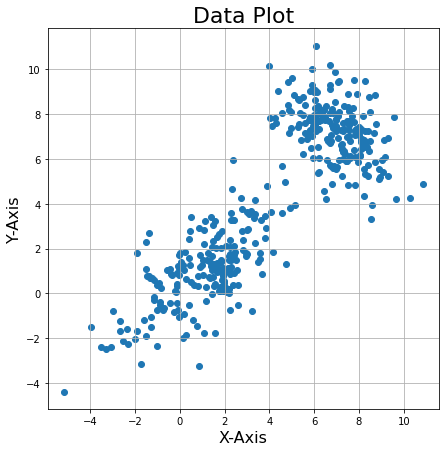

In [3]:
plt.figure(figsize=(7,7))                                 
plt.scatter(d[:,0], d[:,1], marker='o')     
plt.axis('equal')                                  
plt.xlabel('X-Axis', fontsize=16)              
plt.ylabel('Y-Axis', fontsize=16)                     
plt.title('Data Plot', fontsize=22)    
plt.grid()            
plt.show()

In [4]:
# STEP 1: Taking initial random values for prediction and clustering
m1 = random.choice(d)
m2 = random.choice(d)
cov1 = np.cov(np.transpose(d))
cov2 = np.cov(np.transpose(d))
pi = 0.5

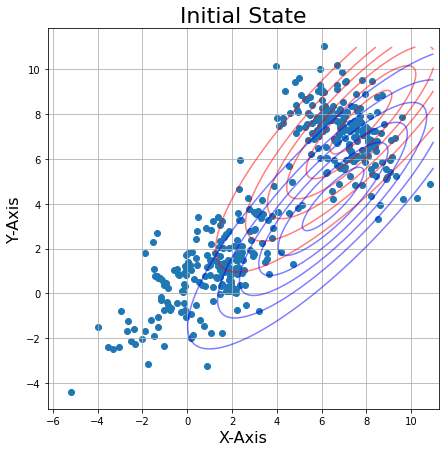

In [5]:
# Plotting the initial state of the prediction and clustering
x1 = np.linspace(-4,11,200)  
x2 = np.linspace(-4,11,200)
X, Y = np.meshgrid(x1,x2) 

Z1 = multivariate_normal(m1, cov1)  
Z2 = multivariate_normal(m2, cov2)

pos = np.empty(X.shape + (2,))                # a new array of given shape and type, without initializing entries
pos[:, :, 0] = X; pos[:, :, 1] = Y   

plt.figure(figsize=(7,7))                                                          # creating the figure and assigning the size
plt.scatter(d[:,0], d[:,1], marker='o')     
plt.contour(X, Y, Z1.pdf(pos), colors="r" ,alpha = 0.5) 
plt.contour(X, Y, Z2.pdf(pos), colors="b" ,alpha = 0.5) 
plt.axis('equal')                                                                  # making both the axis equal
plt.xlabel('X-Axis', fontsize=16)                                                  # X-Axis
plt.ylabel('Y-Axis', fontsize=16)                                                  # Y-Axis
plt.title('Initial State', fontsize=22)                                            # Title of the plot
plt.grid()                                                                         # displaying gridlines
plt.show()

In [6]:
# STEP 2: Estimation step
def Estep(lis1):
    m1=lis1[0]
    m2=lis1[1]
    cov1=lis1[2]
    cov2=lis1[3]
    pi=lis1[4]
    
    pt2 = multivariate_normal.pdf(d, mean=m2, cov=cov2)
    pt1 = multivariate_normal.pdf(d, mean=m1, cov=cov1)
    w1 = pi * pt2
    w2 = (1-pi) * pt1
    eval1 = w1/(w1+w2)

    return(eval1)

In [7]:
# STEP 3: Maximization step
def Mstep(eval1):
    num_mu1,din_mu1,num_mu2,din_mu2=0,0,0,0

    for i in range(0,len(d)):
        num_mu1 += (1-eval1[i]) * d[i]
        din_mu1 += (1-eval1[i])

        num_mu2 += eval1[i] * d[i]
        din_mu2 += eval1[i]

    mu1 = num_mu1/din_mu1
    mu2 = num_mu2/din_mu2

    num_s1,din_s1,num_s2,din_s2=0,0,0,0
    for i in range(0,len(d)):

        q1 = np.matrix(d[i]-mu1)
        num_s1 += (1-eval1[i]) * np.dot(q1.T, q1)
        din_s1 += (1-eval1[i])

        q2 = np.matrix(d[i]-mu2)
        num_s2 += eval1[i] * np.dot(q2.T, q2)
        din_s2 += eval1[i]

    s1 = num_s1/din_s1
    s2 = num_s2/din_s2

    pi = sum(eval1)/len(d)
    
    lis2=[mu1,mu2,s1,s2,pi]
    return(lis2)

In [32]:
# Function to plot final data after clustering using EM Algorithm
def plot(lis1):
    mu1=lis1[0]
    mu2=lis1[1]
    s1=lis1[2]
    s2=lis1[3]
    Z1 = multivariate_normal(mu1, s1)  
    Z2 = multivariate_normal(mu2, s2)
    
    s_1 = 0
    s_2 = 0
    
    for i in s1:
        s_1 += sum(i)
    for i in s2:
        s_2 += sum(i)
        
    s_1 /= len(s1)
    s_2 /= len(s2)
    
    s_2 = s_2/(max(s_1) + max(s_2))
    
    print('theta1: ', s_1) 
    print('theta2: ', s_2)

    pos = np.empty(X.shape + (2,))                # a new array of given shape and type, without initializing entries
    pos[:, :, 0] = X; pos[:, :, 1] = Y   

    plt.figure(figsize=(7,7))                                                          # creating the figure and assigning the size
    plt.scatter(d[:,0], d[:,1], marker='o')     
    plt.contour(X, Y, Z1.pdf(pos), colors="r" ,alpha = 0.5) 
    plt.contour(X, Y, Z2.pdf(pos), colors="b" ,alpha = 0.5) 
    plt.axis('equal')                                                                  # making both the axis equal
    plt.xlabel('X-Axis', fontsize=16)                                                  # X-Axis
    plt.ylabel('Y-Axis', fontsize=16)                                                  # Y-Axis
    plt.grid()                                                                         # displaying gridlines
    plt.show()

theta1:  [[0.41710737 0.48684999]]
theta2:  [[0.87546797 0.84718173]]


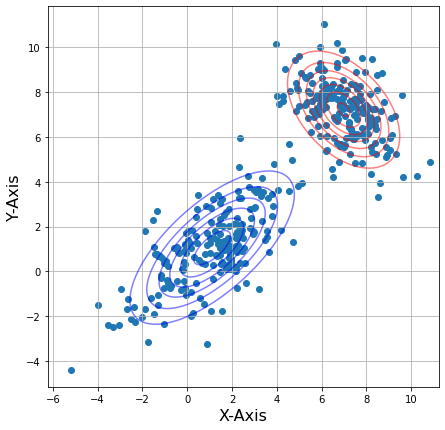

In [33]:
# Plotting final clustered dataset after multiple iterations
iterations = 20
lis1=[m1,m2,cov1,cov2,pi]
for i in range(0,iterations):
    lis2 = Mstep(Estep(lis1))
    lis1 = lis2
    # if(i==0 or i == 4 or i == 9 or i == 14 or i == 19):
    if i == 19:
        plot(lis1)